In [1]:
# Re-import necessary libraries after code execution reset
import pandas as pd
import matplotlib.pyplot as plt
import ast


In [2]:
import os
data_path = '../../data/instagram'
output_path= '../../data/cultural_analysis/instagram/demographic/'
os.makedirs(output_path, exist_ok=True)

file_paths = {
    "Innisfree": f"{data_path}/innisfree.csv",
    "Sulwhasoo": f"{data_path}/sulwhasoo.csv", 
    "Glossier": f"{data_path}/glossier.csv",
    "Laneige": f"{data_path}/laneige.csv",
    "Tarte": f"{data_path}/tarte_cosmetics.csv",
    "e.l.f.": f"{data_path}/elf_cosmetics.csv",
    "Fenty Beauty": f"{data_path}/fenty_beauty.csv",
    "Estée Lauder": f"{data_path}/estee_lauder.csv",
    "Etude House": f"{data_path}/etude_house.csv",
    "COSRX": f"{data_path}/cosrx.csv"
}

In [3]:
country_map = {
    "usa": ("USA", "north_america"),
    "canada": ("Canada", "north_america"),
    "uk": ("UK", "europe"),
    "france": ("France", "europe"),
    "germany": ("Germany", "europe"),
    "italy": ('Italy', 'europe'),
    "spain": ('Spain', 'europe'),
    "japan": ('Japan', 'asia'),
    "china": ('China', 'asia'),
    "india": ('India', 'asia'),
    "brazil": ('Brazil', 'other'),
    "mexico": ('Mexico', 'other'),
    "russia": ('Russia', 'europe'),
    "australia": ('Australia', 'other'),
    "philippines": ('Philippines', 'asia'),
    "thailand": ('Thailand', 'asia'),
    "indonesia": ('Indonesia', 'asia'),
    "malaysia": ('Malaysia', 'asia'),
    "vietnam": ('Vietnam', 'asia'),
    "singapore": ('Singapore', 'asia'),
    "taiwan": ('Taiwan', 'asia')
}

In [7]:
def extract_hashtags_with_countries(hashtag_str):
    try:
        hashtags = ast.literal_eval(hashtag_str)
        if isinstance(hashtags, list):
            return [tag.lower() for tag in hashtags if any(country in tag.lower() for country in country_map.keys())]
    except (ValueError, SyntaxError):
        return []
    return []

In [18]:
country_data = []

for brand, path in file_paths.items():
    df = pd.read_csv(path)
    if 'hashtags' in df.columns:
        df['geo_hashtags'] = df['hashtags'].apply(extract_hashtags_with_countries)
        for tags in df['geo_hashtags']:
            for tag in tags:
                for key, (country, region) in country_map.items():
                    if key in tag:
                        country_data.append({'brand': brand, 'country': country, 'region': region})
                        break

country_df = pd.DataFrame(country_data)
country_counts = country_df.groupby(['brand', 'country', 'region']).size().reset_index(name='count')

/var/folders/rg/04c1t0sd7zdc_6sl31l_r9km0000gn/T/ipykernel_8476/3947075860.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/rg/04c1t0sd7zdc_6sl31l_r9km0000gn/T/ipykernel_8476/3947075860.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/rg/04c1t0sd7zdc_6sl31l_r9km0000gn/T/ipykernel_8476/3947075860.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


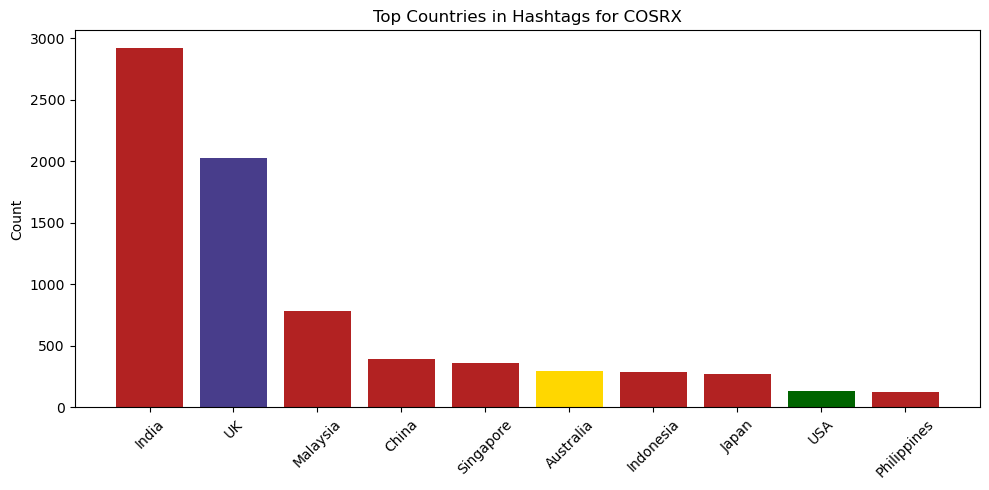

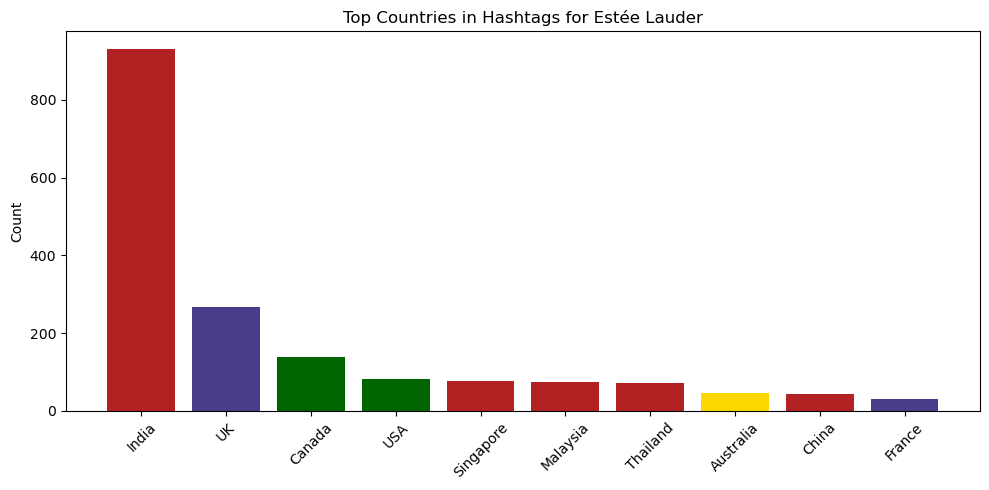

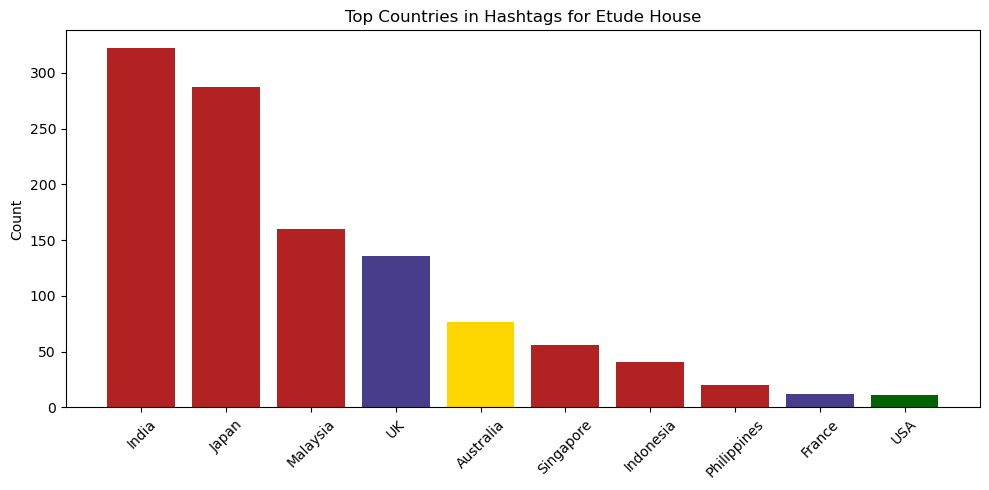

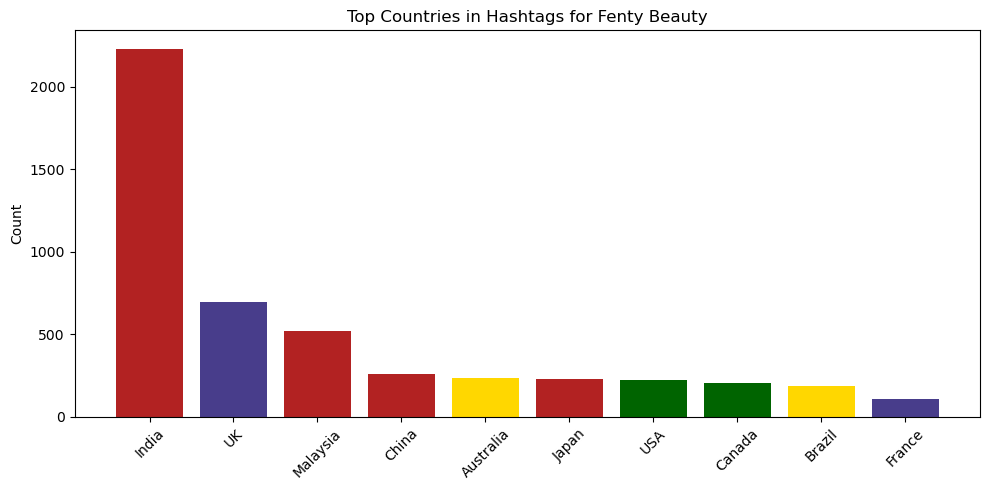

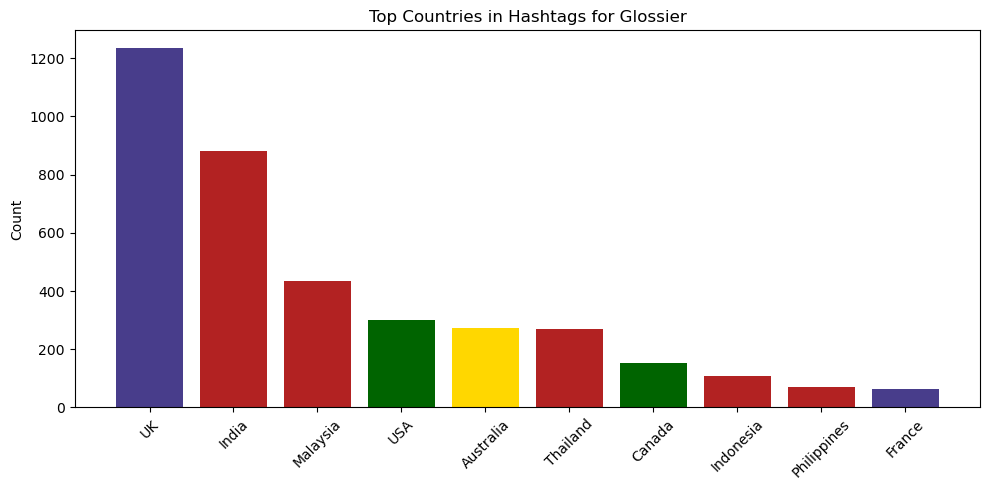

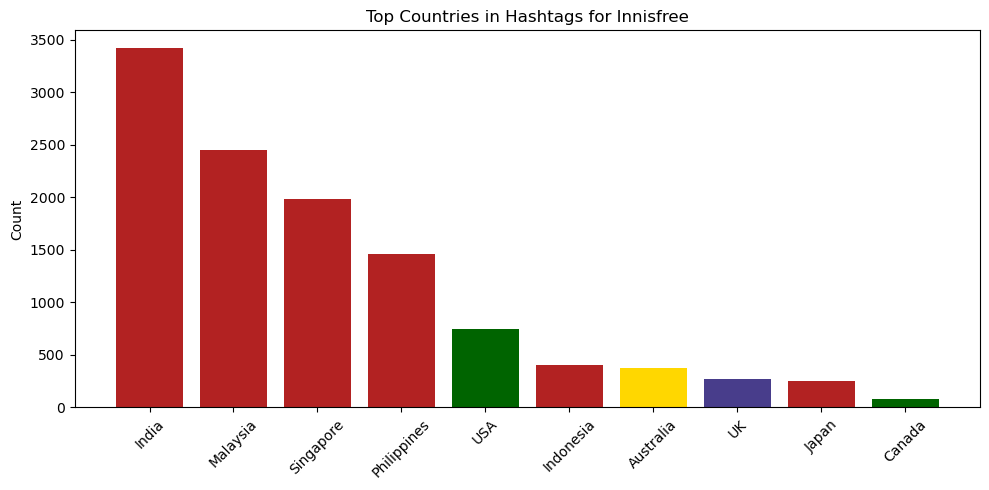

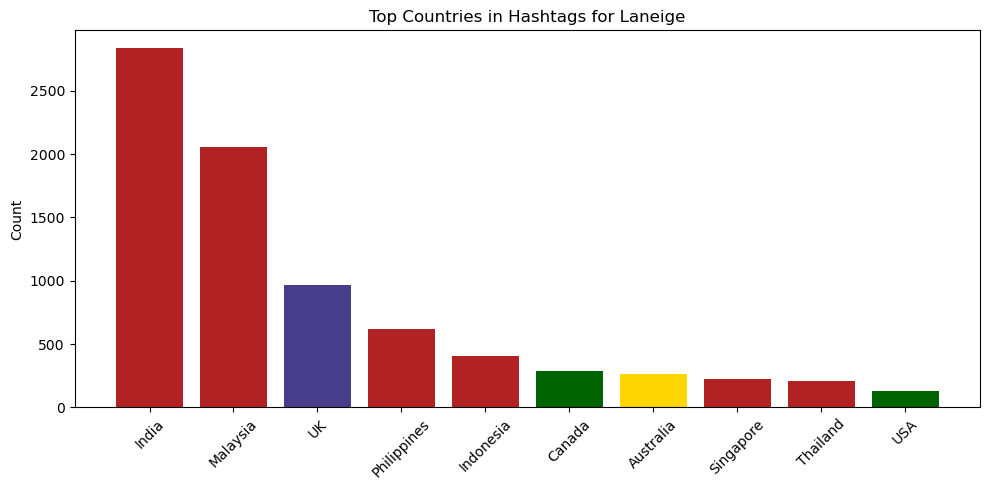

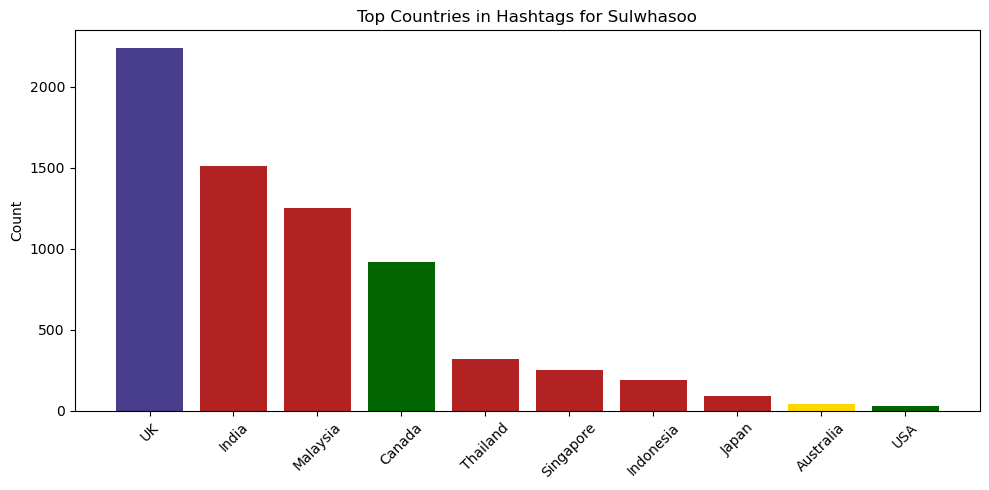

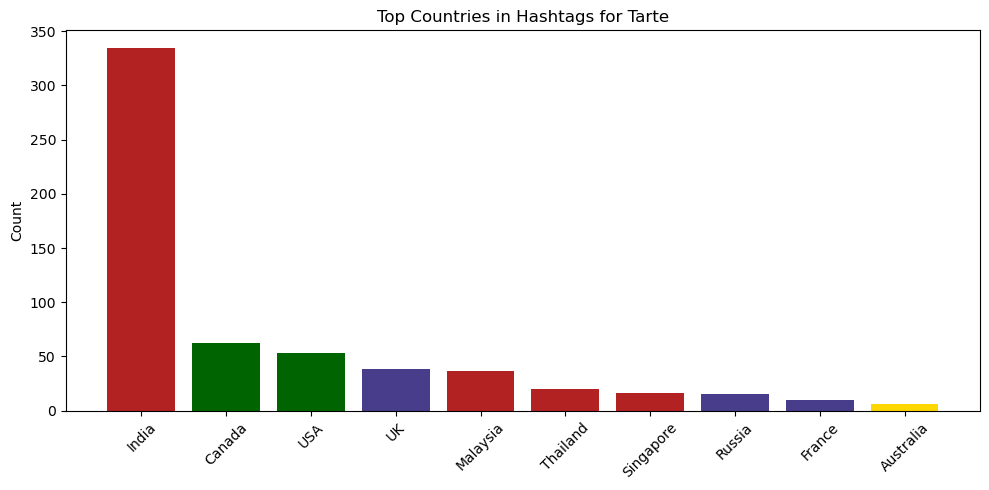

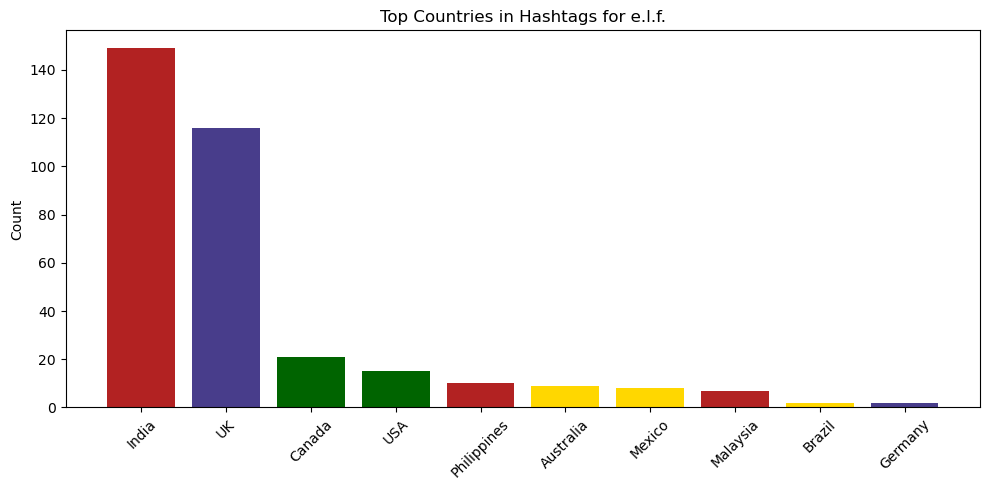

In [26]:
region_colors = {
    'asia': 'firebrick',
    'north_america': 'darkgreen',
    'europe': 'darkslateblue',
    'other': 'gold'
}

for brand in country_counts['brand'].unique():
    brand_data = country_counts[country_counts['brand'] == brand].sort_values(by='count', ascending=False).head(10)
    colors = [region_colors[region] for region in brand_data['region']]
    plt.figure(figsize=(10, 5))
    plt.bar(brand_data['country'], brand_data['count'], color=colors)
    plt.title(f"Top Countries in Hashtags for {brand}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.legend
    plt.show()
    plt.savefig(os.path.join(output_path, f"{brand}_top_countries.png"))
    plt.close()